In [1]:
%matplotlib inline

# Cargar una imagen con skimage

from skimage import io

filename = os.path.join(skimage.data_dir, 'camera.png')

camera = io.imread(filename)

In [204]:
from skimage import io

pathImg="/Users/Ismael/Desktop/TFG_DietaPorDientes/TrabajosPasadosPorJose/dietaJose/ATP02 UE4 46.jpg"

img = io.imread(pathImg)

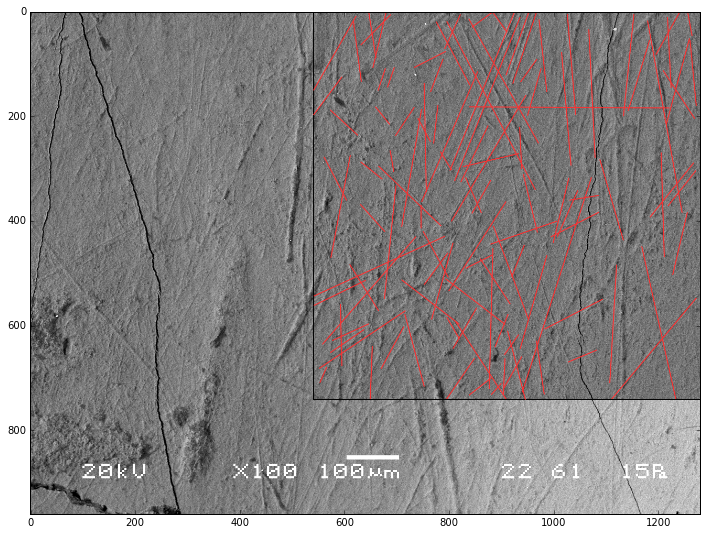

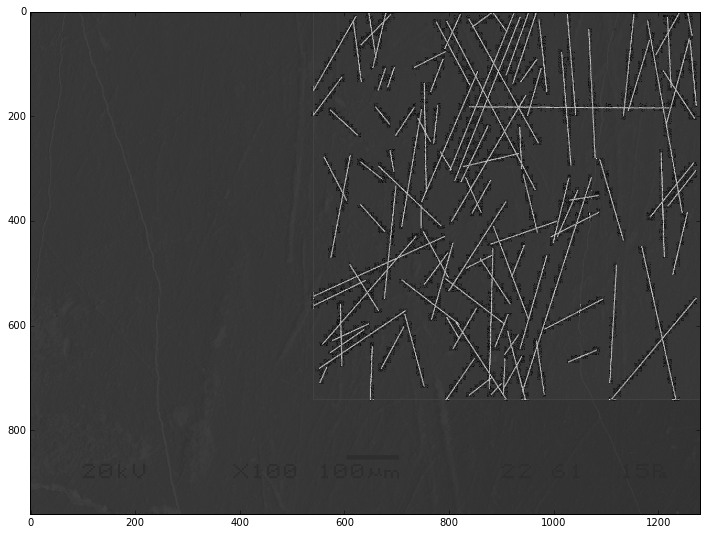

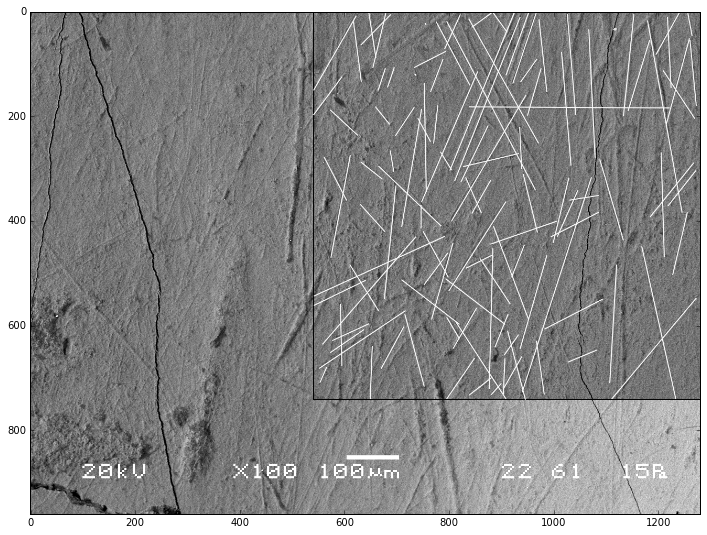

In [205]:
from skimage import img_as_ubyte
from skimage.color import rgb2grey

from skimage.color import rgb2hsv
import numpy as np

import matplotlib.pyplot as plt

#from skimage.data import camera

#image = camera()

#imgGrey=rgb2grey(img)

#imgGrey=img_as_ubyte(rgb2grey(img))
#imgGrey=rgb2grey(img)



rojo=img[:,:,0]

imgHSV=rgb2hsv(img)
distance_red = rgb2grey(1 - np.abs(imgHSV - (0, 1, 0)))


plt.figure(figsize=(12, 12)) 
plt.imshow(img, cmap='gray')


plt.figure(figsize=(12, 12)) 
plt.imshow(distance_red, cmap='gray')

plt.figure(figsize=(12, 12)) 
plt.imshow(rojo, cmap='gray')



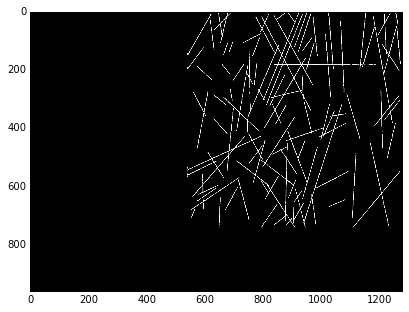

In [207]:
from skimage.filters import threshold_otsu

threshold_global_otsu = threshold_otsu(distance_red)

imgBin = distance_red >= threshold_global_otsu

plt.figure(figsize=(10, 5)) 
plt.imshow(imgBin, cmap='gray')

1) Hacer crop a la zona metiendo los parámetros manualmente
1.1) Hacer crop a la zona obteniendo parámetros

2) Quita ruido y skeletoniza

3) Transformada de Hough

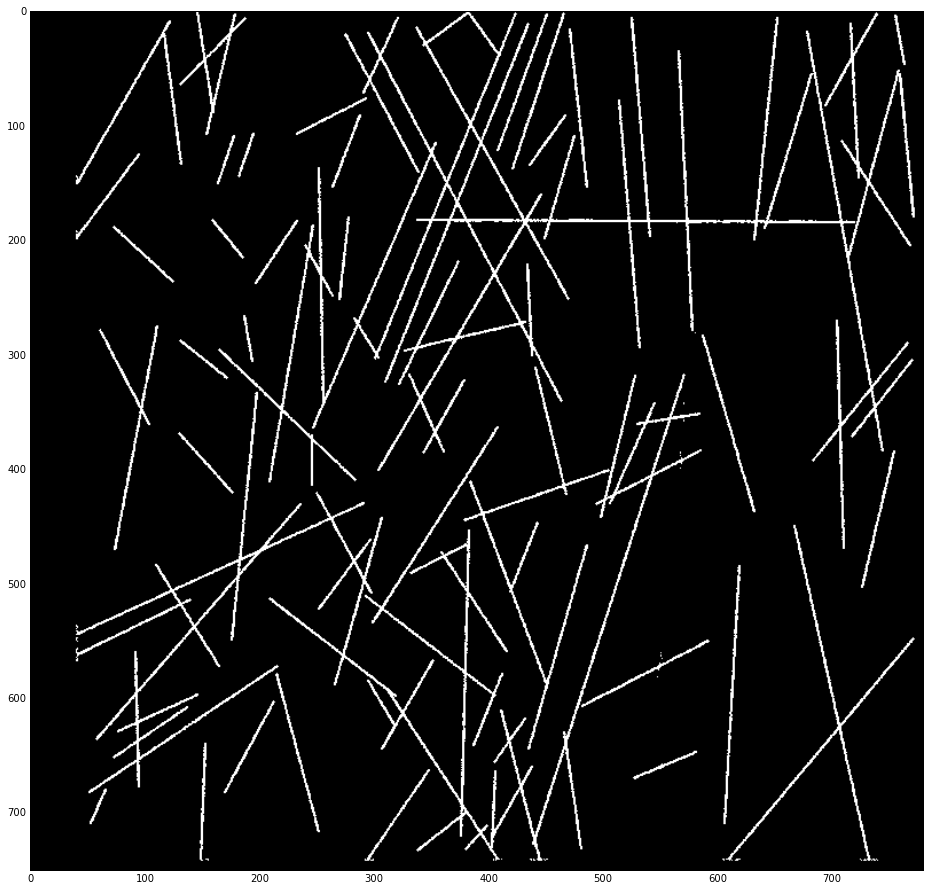

In [221]:
imgBinCrop = imgBin[0:750,500:1500]
imgCrop = img[0:750,500:1500]
#imgBinCrop = imgBin

plt.figure(figsize=(16, 16)) 
plt.imshow(imgBinCrop, cmap='gray')

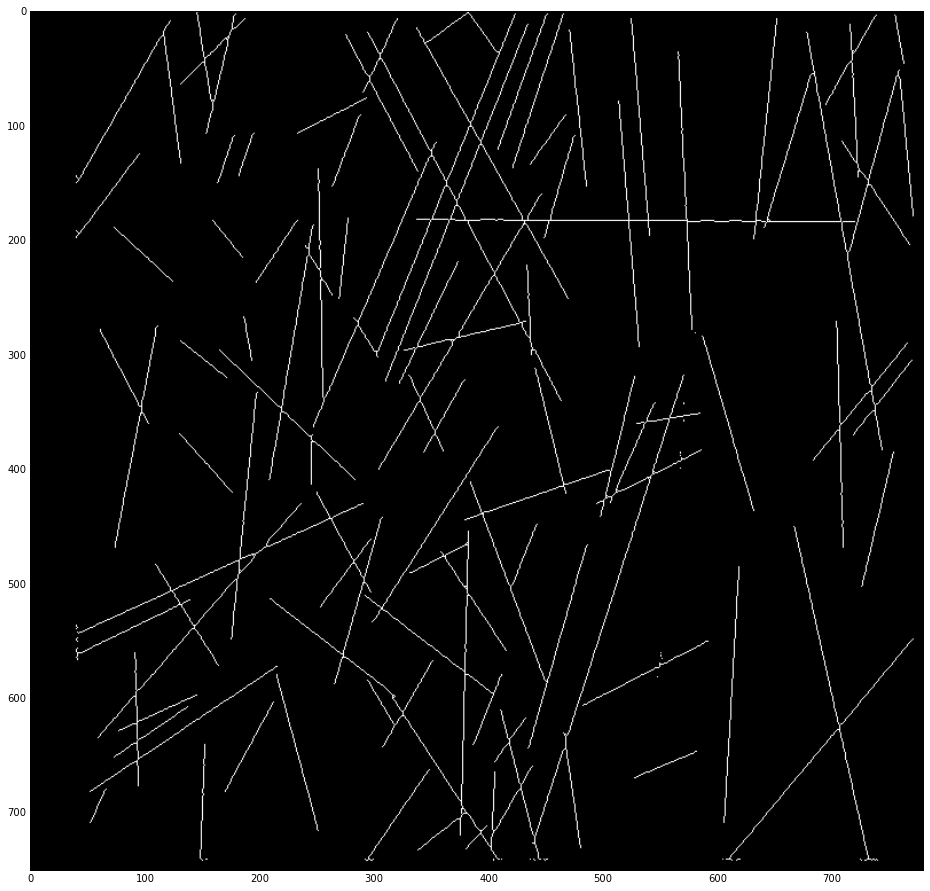

In [223]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image, remove_small_objects
from skimage.morphology import disk, reconstruction
from skimage.morphology import binary_erosion,rectangle,binary_dilation



selem2 = rectangle(8,1)
selem = rectangle(3,1)

#sinRuido = binary_dilation(imgBinCrop,selem2)
#sinRuido = binary_erosion(imgBinCrop,selem)

sinRuido = skeletonize(imgBinCrop)


plt.figure(figsize=(16, 16)) 
plt.imshow(sinRuido, cmap='gray')


In [210]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import numpy as np
import matplotlib.pyplot as plt


lines = probabilistic_hough_line(sinRuido, threshold=10, line_length=5,
                                 line_gap=3)



#plt.figure(figsize=(16, 16)) 

#plt.imshow(sinRuido, cmap=plt.cm.gray)


for line in lines:
    p0, p1 = line
    #plt.plot((p0[0], p1[0]), (p0[1], p1[1]))




[((438, 726), (569, 322)),
 ((302, 301), (424, 0)),
 ((302, 300), (384, 97)),
 ((90, 656), (133, 627)),
 ((52, 681), (190, 588)),
 ((439, 726), (467, 639)),
 ((585, 183), (596, 183)),
 ((406, 183), (573, 183)),
 ((574, 216), (565, 36)),
 ((577, 278), (574, 217)),
 ((143, 620), (215, 572)),
 ((385, 136), (433, 13)),
 ((468, 250), (337, 15)),
 ((59, 634), (236, 430)),
 ((769, 172), (758, 52)),
 ((310, 322), (389, 125)),
 ((631, 199), (652, 0)),
 ((742, 380), (678, 20)),
 ((630, 434), (587, 285)),
 ((450, 587), (380, 405)),
 ((261, 331), (352, 117)),
 ((66, 625), (106, 579)),
 ((370, 171), (405, 83)),
 ((255, 344), (253, 201)),
 ((422, 42), (434, 12)),
 ((469, 251), (395, 118)),
 ((724, 276), (719, 247)),
 ((458, 330), (325, 79)),
 ((569, 128), (569, 121)),
 ((365, 183), (392, 183)),
 ((531, 293), (513, 79)),
 ((408, 120), (450, 4)),
 ((76, 453), (110, 276)),
 ((621, 184), (722, 184)),
 ((252, 206), (251, 138)),
 ((155, 98), (178, 4)),
 ((705, 333), (703, 271)),
 ((518, 354), (527, 320)),

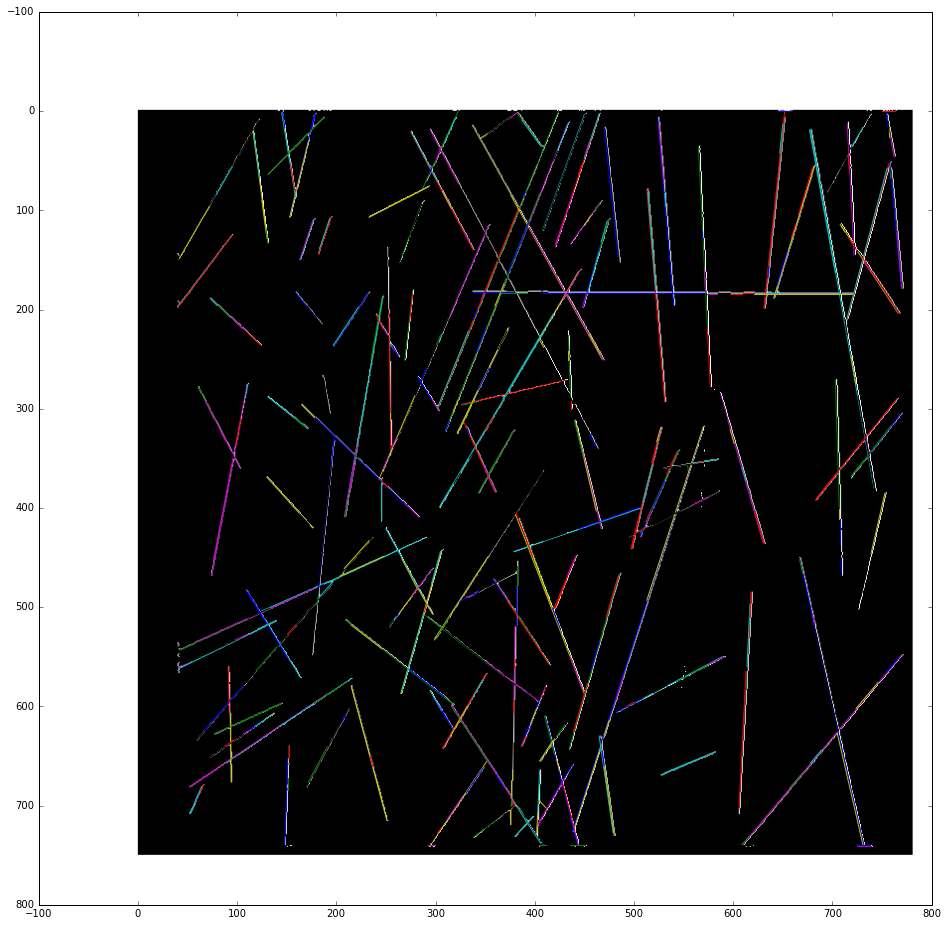

In [211]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

##imports para el uso de interactive
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt


def proHough(threshold,line_length,line_gap):

    lines = probabilistic_hough_line(sinRuido, threshold, line_length,
                                 line_gap)
    plt.figure(figsize=(16, 16)) 
    plt.imshow(sinRuido, cmap=plt.cm.gray)
    for line in lines:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
    #return None 
    return lines;
m=proHough(10,5,3)
w = interactive(proHough, threshold=13, line_length=6,line_gap=8)#
display(w)
#13/5/5

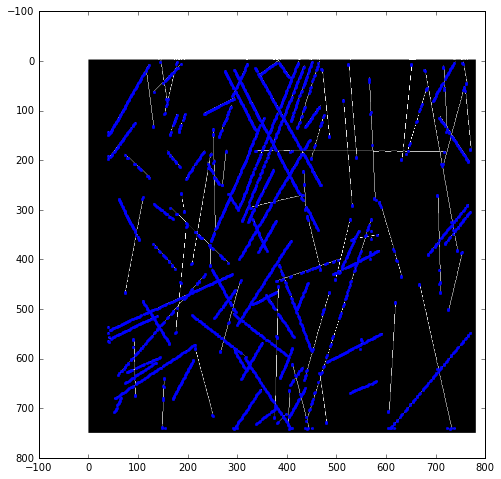

In [224]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks, corner_fast
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

####################3
image=sinRuido
###########################

coords = corner_peaks(corner_harris(image), min_distance=5)
coords = corner_peaks(corner_fast(image, 9), min_distance=1)

#coords_subpix = corner_subpix(image, coords, window_size=13)


plt.figure(figsize=(8, 8)) 
plt.imshow(sinRuido, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
#plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

#fig, ax = plt.subplots()
#ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
#ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)

#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
#ax.axis((0, 350, 350, 0))
#plt.show()

In [225]:
def segmentsDistance(seg1, seg2):
    return segments_distance(seg1[0][0], seg1[0][1], seg1[1][0], seg1[1][1],
                             seg2[0][0], seg2[0][1], seg2[1][0], seg2[1][1])

def segments_distance(x11, y11, x12, y12, x21, y21, x22, y22):
    """distance between two segments in the plane:
    one segment is (x11, y11) to (x12, y12)
    the other is   (x21, y21) to (x22, y22)
    """
    if segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22): 
            return 0
    # try each of the 4 vertices w/the other segment
    distances = []
    distances.append(point_segment_distance(x11, y11, x21, y21, x22, y22))
    distances.append(point_segment_distance(x12, y12, x21, y21, x22, y22))
    distances.append(point_segment_distance(x21, y21, x11, y11, x12, y12))
    distances.append(point_segment_distance(x22, y22, x11, y11, x12, y12))
    return min(distances)

def segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22):
    """ whether two segments in the plane intersect:
      one segment is (x11, y11) to (x12, y12)
      the other is   (x21, y21) to (x22, y22)
    """
    dx1 = x12 - x11
    dy1 = y12 - y11
    dx2 = x22 - x21
    dy2 = y22 - y21
    delta = dx2 * dy1 - dy2 * dx1
    if delta == 0: 
        return False  # parallel segments
    s = (dx1 * (y21 - y11) + dy1 * (x11 - x21)) / delta
    t = (dx2 * (y11 - y21) + dy2 * (x21 - x11)) / (-delta)
    return (0 <= s <= 1) and (0 <= t <= 1)

import math
def point_segment_distance(px, py, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    if dx == dy == 0:  # the segment's just a point
        return math.hypot(px - x1, py - y1)

    # Calculate the t that minimizes the distance.
    t = ((px - x1) * dx + (py - y1) * dy) / (dx * dx + dy * dy)

    # See if this represents one of the segment's
    # end points or a point in the middle.
    if t < 0:
        dx = px - x1
        dy = py - y1
    elif t > 1:
        dx = px - x2
        dy = py - y2
    else:
        near_x = x1 + t * dx
        near_y = y1 + t * dy
        dx = px - near_x
        dy = py - near_y

    return math.hypot(dx, dy)

In [226]:
import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    if cos_ > 1: cos_ =1
    # Get angle in radians and then convert to degrees
    angle = math.acos(cos_)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg

In [227]:
import networkx as nx
G=nx.Graph()


epsilon1=6
epsilon2=5

#8/5

for i in range(len(lines)):
    G.add_node(i)


for i in range(len(lines)-1):
    for j in range(i+1,len(lines)):
        angle = ang(lines[i],lines[j])        
        #print(angle)
        if angle <= epsilon2:
            distance = segmentsDistance(lines[i],lines[j])
            #print(distance)
            if distance <= epsilon1:
                #print("combina ",i,j)
                G.add_edge(i,j)


In [228]:
#nx.draw(G)


In [229]:
from networkx.algorithms import approximation as apxa

k_components = apxa.k_components(G)
k_components[1][0]

{0, 28, 137, 209, 242, 296, 297, 373, 474, 497, 595, 628}

In [230]:
import math

def pointDistance(p1, p2):
    dx = p1[0] - p2[0]
    dy = p1[1] - p2[1]
    return (dx*dx + dy*dy)**0.5

def combinaSegmentos(segmentosList):
    print("combina",segmentosList)
    Xs=list(map(lambda x:[x[0][0],x[1][0]],segmentosList))
    Ys=list(map(lambda x:[x[0][1],x[1][1]],segmentosList))
    xMax=np.max(Xs)
    yMax=np.max(Ys)
    xMin=np.min(Xs)
    yMin=np.min(Ys)
    if (xMax,yMax) in set(map(lambda x:x[0],segmentosList)):
        #print("devuelvo",((xMax,yMax),(xMin,yMin)))
        return ((xMax,yMax),(xMin,yMin))
    else:
        #print("devuelvo",((xMax,yMin),(xMin,yMax)))
        return ((xMax,yMin),(xMin,yMax))

segmentosDeVerdad = []
for i in range(len(k_components[1])):
    segmentos=list(map(lambda x:lines[x],k_components[1][i]))
    segmentosDeVerdad.append(combinaSegmentos(segmentos))
    
segmentosDeVerdad

combina [((722, 145), (715, 12)), ((716, 44), (716, 38)), ((723, 145), (723, 134)), ((721, 113), (721, 101)), ((722, 132), (722, 121)), ((716, 18), (716, 12)), ((717, 63), (717, 57)), ((720, 120), (720, 114)), ((719, 74), (719, 61)), ((720, 94), (720, 81)), ((717, 37), (717, 24)), ((718, 56), (718, 38))]
combina [((408, 234), (295, 20)), ((325, 79), (320, 69)), ((460, 335), (456, 327)), ((361, 147), (348, 122)), ((303, 34), (299, 26)), ((340, 107), (328, 84)), ((373, 169), (370, 163)), ((328, 82), (296, 21)), ((463, 340), (364, 153)), ((406, 231), (403, 225)), ((398, 216), (395, 210)), ((336, 97), (331, 87)), ((435, 288), (431, 280)), ((462, 339), (445, 307)), ((428, 275), (424, 267)), ((418, 253), (411, 240)), ((381, 184), (378, 178)), ((347, 120), (344, 115)), ((364, 152), (361, 146)), ((440, 295), (421, 259))]
combina [((438, 726), (570, 320)), ((489, 568), (570, 318)), ((472, 625), (482, 594)), ((471, 624), (473, 617)), ((560, 347), (562, 341)), ((564, 335), (569, 319)), ((441, 721

[((723, 145), (715, 12)),
 ((463, 340), (295, 20)),
 ((570, 318), (438, 726)),
 ((744, 383), (678, 19)),
 ((434, 12), (310, 323)),
 ((122, 10), (40, 150)),
 ((681, 56), (640, 189)),
 ((540, 196), (524, 7)),
 ((757, 53), (714, 215)),
 ((423, 3), (301, 302)),
 ((578, 278), (565, 36)),
 ((771, 179), (758, 56)),
 ((632, 436), (586, 284)),
 ((256, 138), (251, 345)),
 ((247, 188), (208, 410)),
 ((770, 548), (610, 739)),
 ((65, 680), (52, 708)),
 ((132, 133), (116, 21)),
 ((467, 421), (440, 312)),
 ((652, 7), (632, 199)),
 ((111, 276), (73, 469)),
 ((445, 161), (304, 400)),
 ((710, 468), (703, 271)),
 ((532, 293), (513, 79)),
 ((94, 126), (40, 198)),
 ((528, 319), (497, 441)),
 ((179, 4), (153, 107)),
 ((354, 116), (247, 363)),
 ((469, 251), (337, 15)),
 ((263, 248), (240, 205)),
 ((761, 44), (755, 5)),
 ((619, 485), (605, 708)),
 ((303, 301), (283, 270)),
 ((373, 219), (322, 325)),
 ((338, 140), (275, 21)),
 ((198, 334), (175, 548)),
 ((232, 184), (197, 237)),
 ((235, 431), (58, 635)),
 ((73

111

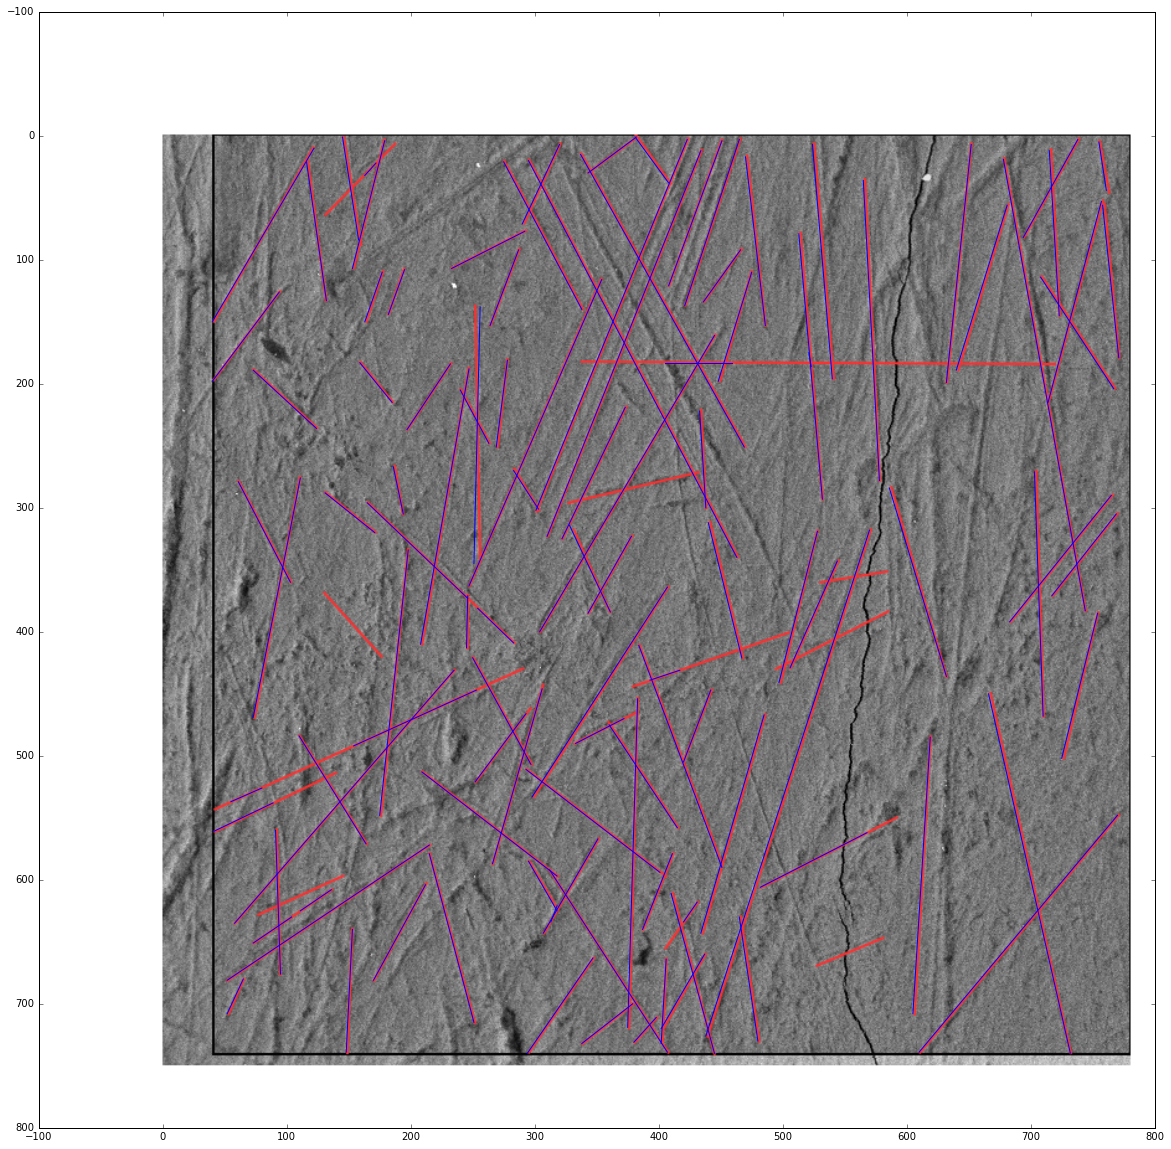

In [231]:
plt.figure(figsize=(20, 20)) 

plt.imshow(imgCrop, cmap=plt.cm.gray)



for line in segmentosDeVerdad:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'b')
len(segmentosDeVerdad)